<a href="https://colab.research.google.com/github/Santosh503/Python_Fundamentals_Assignment./blob/main/santosh_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
# Load the dataset
url = "https://raw.githubusercontent.com/mohammedAljadd/students-performance-prediction/refs/heads/main/student-data.csv"
data = pd.read_csv(url)

data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [27]:
data['passed'] = data['passed'].map({'yes': 1, 'no': 0})

data.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [28]:
# Extract features and target variable
X = data[['failures', 'studytime', 'absences', 'age']].values
y = data['passed'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [30]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.linear1 = nn.Linear(4, 10)  # Input layer
        self.linear2 = nn.Linear(10, 6)  # Hidden layer
        self.linear3 = nn.Linear(6, 1)   # Output layer (single unit for binary classification)

    def forward(self, x):
        x1 = torch.relu(self.linear1(x))  # ReLU activation on first layer
        x2 = torch.relu(self.linear2(x1)) # ReLU activation on second layer
        x3 = torch.sigmoid(self.linear3(x2))  # Sigmoid activation for output layer (probability)
        return x3

In [31]:
# Initialize the model, loss function, and optimizer
model = BinaryClassifier()
criterion = nn.MSELoss()  # Using MSE loss since we're working with one-hot encoded labels
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Hyperparameters
num_epochs = 1000
train_loss = []
test_loss = []


In [32]:
# Training loop (remains mostly the same)
for ep in range(num_epochs):
    model.train()

    # Forward pass
    predicted_y_train = model(X_train_tensor)
    loss_train = criterion(predicted_y_train.squeeze(), y_train_tensor)  # Squeeze to match target shape

    # Backward pass
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if ep % 100 == 0:
        print(f"Epoch {ep}/{num_epochs}, Train Loss: {loss_train.item()}")

    train_loss.append(loss_train.item())

    # Evaluation on the test set
    model.eval()
    with torch.no_grad():
        predicted_y_test = model(X_test_tensor)
        loss_test = criterion(predicted_y_test.squeeze(), y_test_tensor)  # Squeeze to match target shape
        test_loss.append(loss_test.item())

# Print final evaluation results
print(f"\nFinal Train Loss: {train_loss[-1]}")
print(f"Final Test Loss: {test_loss[-1]}")

# Optionally, evaluate the model accuracy
with torch.no_grad():
    # Convert probabilities to binary predictions (0 or 1)
    predicted_classes_train = (predicted_y_train.squeeze() > 0.5).float()
    predicted_classes_test = (predicted_y_test.squeeze() > 0.5).float()

    # Ensure both ground truth and predictions are in the same format
    accuracy_train = accuracy_score(y_train_tensor, predicted_classes_train)
    accuracy_test = accuracy_score(y_test_tensor, predicted_classes_test)

    print(f"Train Accuracy: {accuracy_train * 100:.2f}%")
    print(f"Test Accuracy: {accuracy_test * 100:.2f}%")


Epoch 0/1000, Train Loss: 0.24218271672725677
Epoch 100/1000, Train Loss: 0.23634003102779388
Epoch 200/1000, Train Loss: 0.23206324875354767
Epoch 300/1000, Train Loss: 0.22884240746498108
Epoch 400/1000, Train Loss: 0.2263563871383667
Epoch 500/1000, Train Loss: 0.22438783943653107
Epoch 600/1000, Train Loss: 0.22279469668865204
Epoch 700/1000, Train Loss: 0.2214736044406891
Epoch 800/1000, Train Loss: 0.22035537660121918
Epoch 900/1000, Train Loss: 0.21937845647335052

Final Train Loss: 0.21850524842739105
Final Test Loss: 0.22261252999305725
Train Accuracy: 67.41%
Test Accuracy: 65.82%


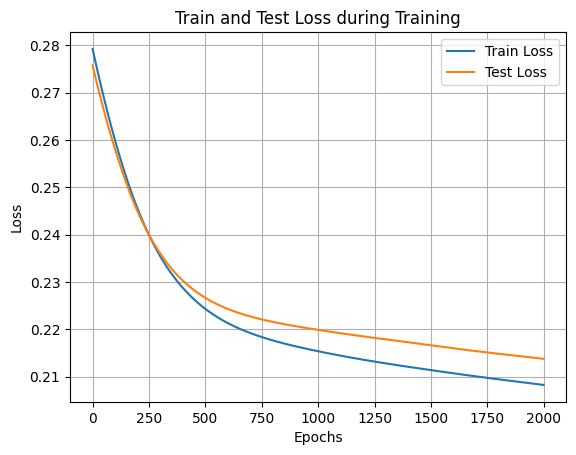

In [22]:
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss during Training')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Print the top 5 train and test predictions
print("\nTop 5 Training Samples (Actual vs Predicted):")
for i in range(5):
    print(f"Train Actual: {y_train_tensor[i].item()}, Predicted: {predicted_classes_train[i].item()}")

print("\nTop 5 Test Samples (Actual vs Predicted):")
for i in range(5):
    print(f"Test Actual: {y_test_tensor[i].item()}, Predicted: {predicted_classes_test[i].item()}")



Top 5 Training Samples (Actual vs Predicted):
Train Actual: 1.0, Predicted: 1.0
Train Actual: 1.0, Predicted: 1.0
Train Actual: 0.0, Predicted: 1.0
Train Actual: 0.0, Predicted: 1.0
Train Actual: 0.0, Predicted: 1.0

Top 5 Test Samples (Actual vs Predicted):
Test Actual: 1.0, Predicted: 1.0
Test Actual: 1.0, Predicted: 1.0
Test Actual: 0.0, Predicted: 1.0
Test Actual: 1.0, Predicted: 1.0
Test Actual: 0.0, Predicted: 1.0
